<a href="https://colab.research.google.com/github/RautenM/PythonFundamentals/blob/main/Project*/-10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [1]:
!pip install mysql.connector

import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from scipy.stats import linregress





url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = pd.read_csv(url)
df

df.info()
df.head()

     |████████████████████████████████| 11.9 MB 4.2 MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=ee559459cffaea09dbb4d990908b42460d22f3e7dff9c1a454fe6f45f1917ef3
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql.connector
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


### Clean the dataset 
---


In [2]:
df.dropna()

,Unnamed: 0,first_name,last_name,name,year,rank,genre
77,77,Rostislav,Aalto,Cleaning Up!,2002,8.3,Documentary
78,78,Veikko,Aaltonen,Is meidn,1993,6.8,Drama
79,79,Veikko,Aaltonen,Juoksuhaudantie,2004,6.3,Comedy
80,80,Veikko,Aaltonen,Juoksuhaudantie,2004,6.3,Drama
81,81,Veikko,Aaltonen,Maa,2001,6.0,Documentary
...,...,...,...,...,...,...,...
368837,368837,Memduh,Ün,Garip,1986,7.9,Comedy
368838,368838,Memduh,Ün,Garip,1986,7.9,Drama
368861,368861,Memduh,Ün,Sezercik aslan parcasi,1972,6.0,Drama
368862,368862,Memduh,Ün,Sezercik aslan parcasi,1972,6.0,Romance


### How many movies of each genre are there?
---

In [24]:
from pandas._libs.hashtable import value_count
def movies_count():
 movies = df
 movie_count = df[df['genre'].value_count()
 return movie_count
movies_count

SyntaxError: ignored

### Which director has the highest ranked movies?
---

In [25]:
h_ranks = df['first_name'].max()
print(h_ranks)

def highest_ranks():
  directors = df
  directors["Top directors"] = df["first_name"] + " " + df["last_name"] 
  best_director = df[df['rank'] == 9.9].groupby('Top directors',)['rank'].count()
  return best_director
highest_ranks()

Þór Elís


Top directors
Abel Gance              1
Andrew Cappelletti      2
András Salamon          1
Arünas Zebriünas        1
Ben Holmes              2
Benjamin Christensen    1
Carole Roussopoulos     5
Debs Tarrier            2
Fedor Hanzekovic        1
Georgi Daneliya         1
Gregg Zehentner         3
Ioana Wieder            2
Ishmael Bernal          1
Isidor Annensky         1
Ivanka Grybcheva        1
Jim Jarmusch            1
Jirí (I) Trnka          1
John Cassavetes         2
Jonathan Demme          2
Julio (I) Bracho        3
Kirsten Tretbar         1
Marcell Jankovics       1
Matthew Crandall        2
Satyen Bose             3
Scott Barkan            3
See-Yuen Ng             1
Sergei M. Eisenstein    1
Sergiu Nicolaescu       2
Vsevolod Pudovkin       1
William T. Hurtz        2
Zack Resnicoff          4
Name: rank, dtype: int64

### How many movies have ranks of over 9?
---


In [26]:
top_ranks = df[df['rank'] > 9].count()
print(top_ranks)
top_ranks[0]

Unnamed: 0       1483
first_name       1483
last_name        1483
name             1483
year             1483
rank             1483
genre            1483
Top directors    1483
dtype: int64


1483

### Plot a bar chart of mean rank and genre
---

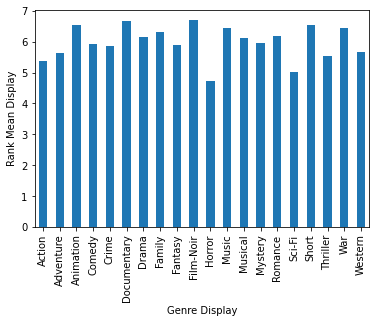

In [27]:
ranking = df.groupby('genre')['rank'].mean()
barchart = ranking.plot(x="genre", y=ranking, kind="bar")
barchart.set_xlabel("Genre Display")
barchart.set_ylabel("Rank Mean Display")
plt.show()

### Plot a pie chart of how many movies of each genre there are 
---


In [28]:
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = pd.read_csv(url)
df

df.info()
df.head()

#data = df.groupby("genre")["name"]
#print(data)

data = df.groupby('name')['genre']

labels = data.keys()


colors = sns.color_palette('green')
plt.pie(data,colors = colors,labels = labels)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


TypeError: ignored

### Plot a graph showing the mean Rank for each year 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


NameError: ignored

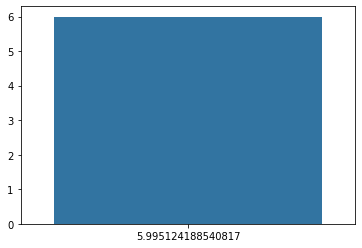

In [29]:
!pip install mysql.connector

import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import seaborn as sns

url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = pd.read_csv(url)
df

df.info()
df.head()


mean_rank = df[["rank"]]
#mean_rank = mean_rank.rename({"rank":"year" },axis=1)
data = mean_rank.mean()

(sns.barplot(x=data, y= data))
chart.set_xlabel('year')
chart.set_ylabel('rank')

chart

#chart = sns.boxplot(data=df)
#chart.set_xticklabels(labels)

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  How many movies have ranks of below 9?
2.  
3.   

### Complete the tasks you have set out in the exercise above. 
---


In [30]:
top_ranks = df[df['rank'] < 2].count()
print(top_ranks)
top_ranks[0]

Unnamed: 0    1284
first_name    1284
last_name     1284
name          1284
year          1284
rank          1284
genre         1284
dtype: int64


1284

# Reflection
----

I like this exercise because it was easy to read and I knew what need be done without investing too much time in reading and understanding the data. 
I have used my knowlage from previous exercises- inspecting and cleaning data. Also I really enjoyed to interrogate and manipulate databaset. 

I still haven't managed to get the graph but will back to it as I believe I can get it right. 